In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

### Working with a first dataframe

In [2]:
names = ['Juan', 'Pedro', 'María', 'Paula', 'Diego', 'Andrea', 'Diana']
ages = [22, 24, 32, 19, 52, 45, 61]

In [3]:
persons = list(zip(names, ages))
persons

[('Juan', 22),
 ('Pedro', 24),
 ('María', 32),
 ('Paula', 19),
 ('Diego', 52),
 ('Andrea', 45),
 ('Diana', 61)]

In [4]:
# Creating the dataframe
persons_df = pd.DataFrame(data = persons, columns = ["Name", "Age"])
persons_df

,Name,Age
0,Juan,22
1,Pedro,24
2,María,32
3,Paula,19
4,Diego,52
5,Andrea,45
6,Diana,61


In [5]:
# Writing CSV
persons_df.to_csv("./data/persons.csv", index = False)

In [6]:
# Reading CSV
persons_df = pd.read_csv("./data/persons.csv", encoding = "latin-1")

In [7]:
persons_df

,Name,Age
0,Juan,22
1,Pedro,24
2,MarÃ­a,32
3,Paula,19
4,Diego,52
5,Andrea,45
6,Diana,61


In [8]:
# If dataframe has too many rows, you can print only the first records
# You can also use the tail() function to print the last records
persons_df.head()

,Name,Age
0,Juan,22
1,Pedro,24
2,MarÃ­a,32
3,Paula,19
4,Diego,52


In [9]:
# Column data types
persons_df.dtypes

Name    object
Age      int64
dtype: object

In [10]:
# Get the greatest age
persons_df_sorted = persons_df.sort_values(["Age"], ascending = False)
persons_df_sorted.head(1)

,Name,Age
6,Diana,61


In [11]:
# Get the greatest age, a better method
persons_df["Age"].max()

61

<BarContainer object of 7 artists>

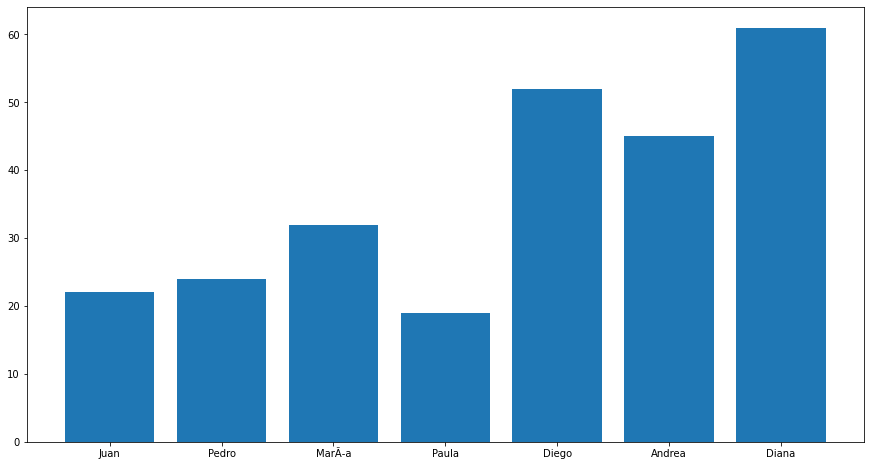

In [12]:
# Creating a chart for visualizing ages
plt.figure(figsize = (15, 8))
plt.bar(persons_df["Name"], persons_df["Age"])

### Experiment with a different dataframe

In [13]:
got_df = pd.read_csv("./data/got.csv")

In [14]:
got_df.head()

,name,age,house
0,Walder Frey,97,House Frey
1,Aemma Arryn,23,House Arryn
2,Sylva Santagar,29,House Santagar
3,Valarr Targaryen,26,House Targaryen
4,Willow Heddle,16,Brotherhood Without Banners


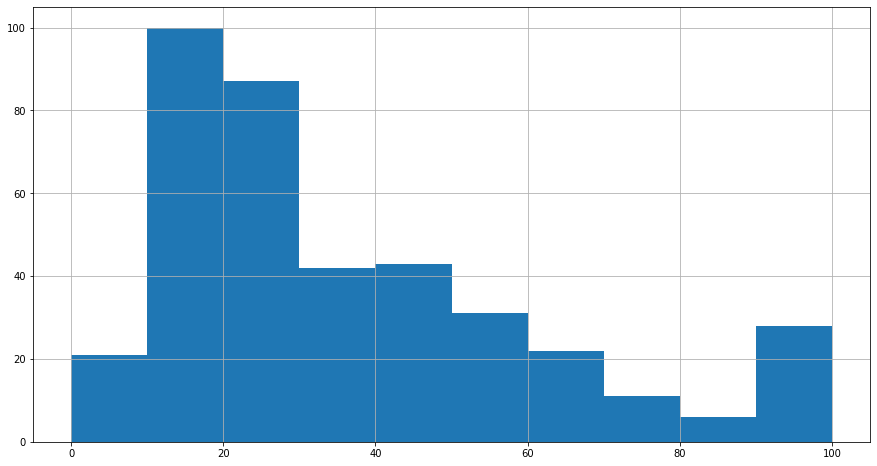

In [15]:
# Trying with a different chart for age
plt.figure(figsize = (15, 8))
got_df["age"].hist()

In [16]:
# Getting unique values for a column
got_df["house"].unique()

array(['House Frey', 'House Arryn', 'House Santagar', 'House Targaryen',
       'Brotherhood Without Banners', 'House Manderly', "Night's Watch",
       'House Botley', 'Burned Men', 'House Velaryon', 'House Tyrell',
       'wildling', 'House Brax', 'House Westerling', 'House Lannister',
       'House Greyjoy', 'House Frey of Riverrun', 'House Osgrey',
       'House Hightower', 'House Baelish', 'House Tully',
       'House Karstark', 'House Ironmaker', 'House Uffering',
       'Happy Port', "Chataya's brothel", 'House Martell', 'Second Sons',
       'House Norcross', 'House Haigh', 'House Bulwer', 'House Crakehall',
       'House Butterwell', 'House Celtigar', 'House Tallhart',
       'House Cassel', 'House Rosby', 'House Cerwyn', 'House Swann',
       'House Vypren', 'House Tarly', 'House Waynwood', 'House Bar Emmon',
       'Faith of the Seven', 'House Mooton', 'House Meadows',
       'House Hayford', 'House Glover', 'House Hunter', 'House Strong',
       'House Wagstaff', 'House Goo

<span style="color:red">Q1: How many houses there are?</span>

In [17]:
got_df["house"].nunique()

119

In [18]:
# Counting records by house
got_df.groupby(["house"]).agg("count")["name"]

house
Blacks                          1
Brotherhood Without Banners     2
Brotherhood without banners     1
Burned Men                      1
Chataya's brothel               2
                               ..
Mance Rayder                    1
Night's Watch                  13
Second Sons                     1
brotherhood without banners     1
wildling                        1
Name: name, Length: 119, dtype: int64

<span style="color:red">Q2: Which is the house with more characters?</span>

In [19]:
got_df.groupby(["house"]).agg("count")["name"].sort_values(ascending = False).head(1)

house
House Frey    82
Name: name, dtype: int64

<span style="color:red">Q3: Which are the 5 houses with more characters?</span>

In [20]:
got_df.groupby(["house"]).agg("count")["name"].sort_values(ascending = False).head()

house
House Frey         82
House Targaryen    44
House Lannister    18
House Martell      14
Night's Watch      13
Name: name, dtype: int64

<span style="color:red">Q4: Which are the 5 oldest characters?</span>

In [21]:
got_df.sort_values(by = "age", ascending = False).head()

,name,age,house
54,Daena Targaryen,100,House Targaryen
363,Rhae Targaryen,100,House Targaryen
314,Larys Strong,100,House Strong
40,Aegon Targaryen (son of Jaehaerys I),100,House Targaryen
295,Falena Stokeworth,100,House Stokeworth


<span style="color:red">Q5: How many characters have 100 years?</span>

In [22]:
got_df.loc[got_df["age"] == 100].shape[0]

25

<span style="color:red">Q6: How is distribuited characters older than 80 by house?</span>

In [23]:
got_df.loc[got_df["age"] > 80, 'house'].value_counts()

House Targaryen     11
House Osgrey         2
Graces               1
House Plumm          1
House Stout          1
House Ironmaker      1
House Arryn          1
House Bracken        1
House Strong         1
House Caswell        1
House Beesbury       1
House Lothston       1
House Swann          1
House Lannister      1
House Frey           1
House Drumm          1
House Webber         1
House Uffering       1
House Butterwell     1
House Stokeworth     1
House Blackwood      1
Blacks               1
House Baelish        1
Name: house, dtype: int64

In [24]:
got_df["name_upper"] = got_df["name"].apply(lambda x: x.upper())

In [25]:
got_df.head()

,name,age,house,name_upper
0,Walder Frey,97,House Frey,WALDER FREY
1,Aemma Arryn,23,House Arryn,AEMMA ARRYN
2,Sylva Santagar,29,House Santagar,SYLVA SANTAGAR
3,Valarr Targaryen,26,House Targaryen,VALARR TARGARYEN
4,Willow Heddle,16,Brotherhood Without Banners,WILLOW HEDDLE


<span style="color:red">Q7: Which are the characters with the largest names?</span>

In [26]:
got_df["name_length"] = got_df["name"].apply(lambda x: len(x))

In [27]:
got_df.sort_values(by = "name_length", ascending = False).head()

,name,age,house,name_upper,name_length
51,Daella Targaryen (daughter of Jaehaerys I),28,House Targaryen,DAELLA TARGARYEN (DAUGHTER OF JAEHAERYS I),42
53,Daenerys Targaryen (daughter of Aegon IV),100,House Targaryen,DAENERYS TARGARYEN (DAUGHTER OF AEGON IV),41
15,Rhaena Targaryen (daughter of Aegon III),100,House Targaryen,RHAENA TARGARYEN (DAUGHTER OF AEGON III),40
17,Rhaenys Targaryen (daughter of Rhaegar),3,House Targaryen,RHAENYS TARGARYEN (DAUGHTER OF RHAEGAR),39
52,Daella Targaryen (daughter of Maekar I),100,House Targaryen,DAELLA TARGARYEN (DAUGHTER OF MAEKAR I),39


### Experimenting with a third dataset

In [28]:
chipo_df = pd.read_csv("./data/chipotle.tsv", sep = '\t')

In [29]:
chipo_df.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

<span style="color:red">Q8: Print first 10 records</span>

In [30]:
chipo_df.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


<span style="color:red">Q9: How many records and columns has the dataset?</span>

In [31]:
chipo_df.shape

(4622, 5)

In [32]:
chipo_df.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

<span style="color:red">Q10: Which is the most ordered item?</span>

In [33]:
chipo_df["item_name"].mode()

0    Chicken Bowl
dtype: object

<span style="color:red">Q11: How many items were ordered in total?</span>

In [34]:
chipo_df["quantity"].sum()

4972

<span style="color:red">Q12: Transforming pice to float</span>

In [35]:
chipo_df["item_price_float"] = chipo_df["item_price"].str.replace("$", "").astype(float)

<span style="color:red">Q13: What is the total revenue reported in the dataset?</span>

In [36]:
chipo_df["item_total_price"] = chipo_df["item_price_float"] * chipo_df["quantity"]

In [37]:
chipo_df["item_total_price"].sum()

39237.02

<span style="color:red">Q14: How many orders were placed?</span>

In [38]:
chipo_df["order_id"].nunique()

1834

<span style="color:red">Q15: What is the average quantity by order?</span>

In [43]:
orders_df = chipo_df.groupby("order_id").agg({"quantity": "sum"}).reset_index()

In [45]:
orders_df["quantity"].mean()

2.711014176663032

In [ ]:
orders_df["item_total_price"]

<span style="color:red">Q16: How many different items were sold?</span>

In [48]:
chipo_df["item_name"].nunique()

50

### Working with more datasets

In [ ]:
euro = pd.read_csv("./data/euro.csv")
euro.head(5)

In [ ]:
# Filtrar por columnas

disciplina = euro[['Team', 'Yellow Cards', 'Red Cards']]
disciplina.head(5)

In [ ]:
# Ordenar registros primero por tarjetas rojas y luego por tarjetas amarillas

disciplina.sort_values(['Red Cards', 'Yellow Cards'], ascending = False)

<span style="color:red">Q17: Which teams score more than 3?</span>

<span style="color:red">Q18: Which team names start with 'G'?</span>

<span style="color:red">Q19: Present only the name and precision for England, Italy and Russia</span>

### More aggregations with syntethic data

In [ ]:
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'], 
        'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'], 
        'name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze', 'Jacon', 'Ryaner', 'Sone', 'Sloan', 'Piger', 'Riani', 'Ali'], 
        'preTestScore': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
        'postTestScore': [25, 94, 57, 62, 70, 25, 94, 57, 62, 70, 62, 70]}

In [ ]:
regiment = pd.DataFrame(raw_data, columns = raw_data.keys())
regiment

In [ ]:
# Estadísticas generales por compañía

regiment.groupby('company').describe()

In [ ]:
# Media de preTestScores agrupados por regimiento y compañía

regiment.groupby(['regiment', 'company']).preTestScore.mean()

In [ ]:
# Media de preTestScores agrupados por regimiento y compañía 
# sin índice jerárquico

regiment.groupby(['regiment', 'company']).preTestScore.mean().unstack()

### Unions / Merges / Joins

In [ ]:
raw_data_1 = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}

raw_data_2 = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}

raw_data_3 = {
        'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}

In [ ]:
data1 = pd.DataFrame(raw_data_1, columns = ['subject_id', 'first_name', 'last_name'])
data2 = pd.DataFrame(raw_data_2, columns = ['subject_id', 'first_name', 'last_name'])

In [ ]:
data1

In [ ]:
data2

In [ ]:
# Unión de dataframes por filas

all_data = pd.concat([data1, data2])
all_data

In [ ]:
# Unión de dataframes por columnas (inner)

pd.merge(data1, data2, on='subject_id', how='inner')

In [ ]:
# Unión de dataframes por columnas (outer)

pd.merge(data1, data2, on='subject_id', how='outer')